# Advanced Course in Machine Learning
## Final Project


<span style="color:blue">**Sanaz Jamalzadeh, 015225524**</span>

## 1. Fake news detection

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import os
import scikitplot.plotters as skplt
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn
from sklearn.manifold import TSNE 
import seaborn as sb
import seaborn as sns


In [2]:
# read data
df_true = pd.read_csv("/home/sanaz/Desktop/Advanced ML/project/train_true.txt", sep='delimiter', header=None)
df_fake = pd.read_csv("/home/sanaz/Desktop/Advanced ML/project/train_fake.txt", sep='delimiter', header=None)

In [3]:
len(df_true)

10634

In [4]:
len(df_fake)

11815

In [5]:
# assign 0 as fake and 1 as true news lable
df_fake["class"] = 0
df_true["class"] = 1


In [6]:
# merge data of to lables and shuffle them
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)
df = df_merge
df = df.sample(frac = 1)
df.shape

(22449, 2)

In [7]:
#Creating a function to process the texts

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [8]:
df[0] = df[0].apply(wordopt)

In [9]:
x = df[0]
y = df["class"]

In [10]:
#Splitting train and test data using 75% vs 25% 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape

((16836,), (5613,))

## Tsne visualization of features

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [11]:
#Convert text to vectors using TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

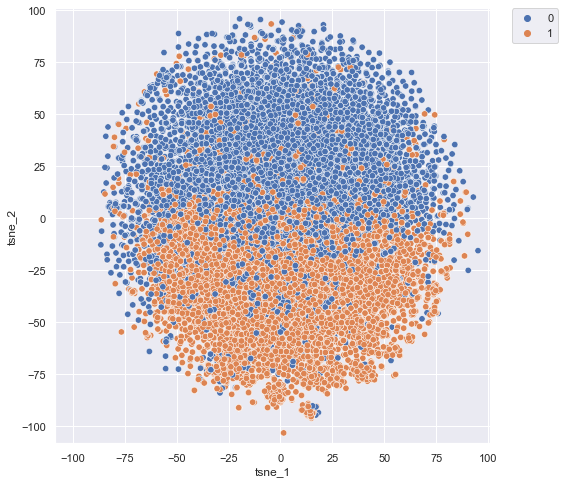

In [13]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(xv_train)
tsne_result.shape


 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_train})
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, lw=0, s=40)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## Linear SVM

In [51]:
# Use the built-in SVM for classification
clf = SVC(kernel='linear')
clf.fit(xv_train.todense(), y_train)
y_pred = clf.predict(xv_test.todense())
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

Accuracy = 94.51%


In [15]:
# Draw the confusion matrix
def plot_cmat(y_test, y_pred):
    skplt.plot_confusion_matrix(y_test,y_pred)
    plt.show()

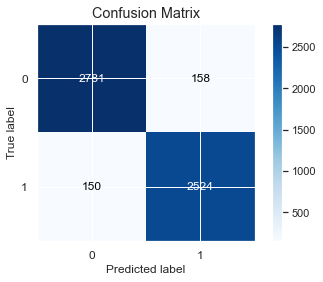

In [53]:
# Draw the confusion matrix
plot_cmat(y_test, y_pred)


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2939
           1       0.94      0.94      0.94      2674

    accuracy                           0.95      5613
   macro avg       0.94      0.95      0.95      5613
weighted avg       0.95      0.95      0.95      5613



In [55]:
## apply SVM on test data for kaggle 

df_test = pd.read_csv("/home/sanaz/Desktop/Advanced ML/project/test.txt", sep='delimiter', header=None)
df_test[0] = df_test[0].apply(wordopt)
X = df_test[0]
df_test.shape

(22449, 1)

In [56]:
df.shape

(22449, 2)

In [57]:
#Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(x)
XV_test = vectorization.transform(X)

In [58]:
clf = SVC(kernel='linear')
clf.fit(XV_train.todense(), y)
Y_pred = clf.predict(XV_test.todense())

In [59]:
Y_pred.shape

(22449,)

In [60]:
## save the results on test data for kaggle, this classifier is selected for kaggle competition

Category = pd.DataFrame(Y_pred)
Category.index = Category.index + 1
Category.to_csv('Sample_test_svm.csv')

### Linear SVM decision-bounadry visualization

In [61]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear')
X = tsne_result[: , :2]
y = y_train
clf.fit(X, y)

SVC(kernel='linear')

In [62]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

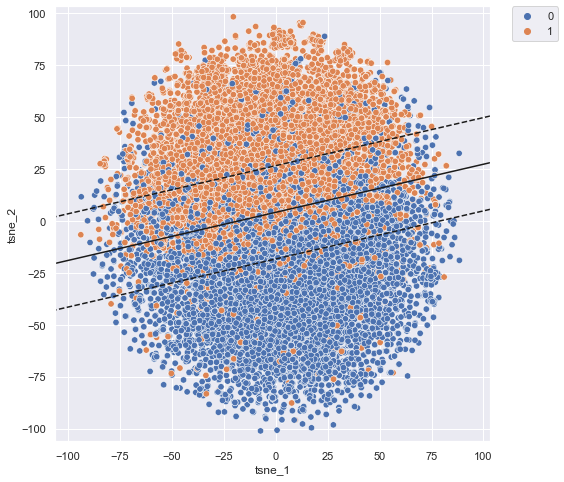

In [63]:
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, lw=0, s=40)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plot_svc_decision_function(clf);

## Multinomial Naive Bayes classifier

In [16]:
mnb = MultinomialNB()
mnb.fit(xv_train.todense(), y_train)

MultinomialNB()

In [17]:
y_pred = mnb.predict(xv_test.todense())
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%")   

Accuracy = 93.50%


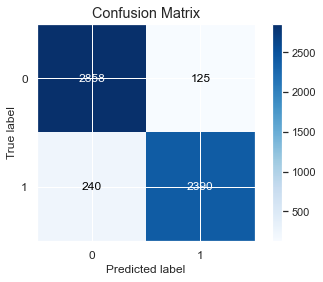

In [18]:
plot_cmat(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2983
           1       0.95      0.91      0.93      2630

    accuracy                           0.93      5613
   macro avg       0.94      0.93      0.93      5613
weighted avg       0.94      0.93      0.93      5613



In [20]:
## apply GNB on test data for kaggle 

df_test = pd.read_csv("/home/sanaz/Desktop/Advanced ML/project/test.txt", sep='delimiter', header=None)
df_test[0] = df_test[0].apply(wordopt)
X = df_test[0]
df_test.shape

(22449, 1)

In [21]:
#Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(x)
XV_test = vectorization.transform(X)

In [25]:
mnb = MultinomialNB()
mnb.fit(XV_train.todense(), y)


Y_pred = mnb.predict(XV_test.todense())

In [26]:
Y_pred.shape

(22449,)

In [27]:
## save the results on test data for kaggle, this classifier is selected for kaggle competition

Category = pd.DataFrame(Y_pred)
Category.index = Category.index + 1
Category.to_csv('Sample_test_MNB.csv')

## Logistic regression

In [123]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [124]:
y_pred=LR.predict(xv_test)
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

Accuracy = 94.37%


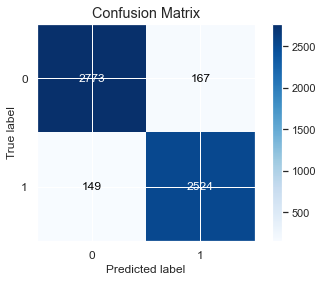

In [125]:
# Draw the confusion matrix
plot_cmat(y_test, y_pred)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2940
           1       0.94      0.94      0.94      2673

    accuracy                           0.94      5613
   macro avg       0.94      0.94      0.94      5613
weighted avg       0.94      0.94      0.94      5613



In [172]:
## apply LR on test data for kaggle 

df_test = pd.read_csv("/home/sanaz/Desktop/Advanced ML/project/test.txt", sep='delimiter', header=None)
df_test[0] = df_test[0].apply(wordopt)
X = df_test[0]
df_test.shape

(22449, 1)

In [173]:
#Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(x)
XV_test = vectorization.transform(X)

In [174]:
LR = LogisticRegression()
LR.fit(XV_train.todense(), y)



Y_pred = LR.predict(XV_test.todense())

In [175]:
Y_pred.shape

(22449,)

In [176]:
## save the results on test data for kaggle, this classifier is selected for kaggle competition

Category = pd.DataFrame(Y_pred)
Category.index = Category.index + 1
Category.to_csv('Sample_test_LR.csv')

### Logistic regression decision boundary visualization

In [152]:
LR = LogisticRegression()
X = tsne_result[: , :2]
y = y_train
LR.fit(X, y)

LogisticRegression()

In [153]:
def plot_lr_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 71)
    y = np.linspace(ylim[0], ylim[1], 81)
    Y, X = np.meshgrid(y, x)
    Z = LR.predict_proba(np.c_[X.ravel(), Y.ravel()])
    Z = Z[:, 1].reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, Z, [0.5], colors='k',
               alpha=1)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

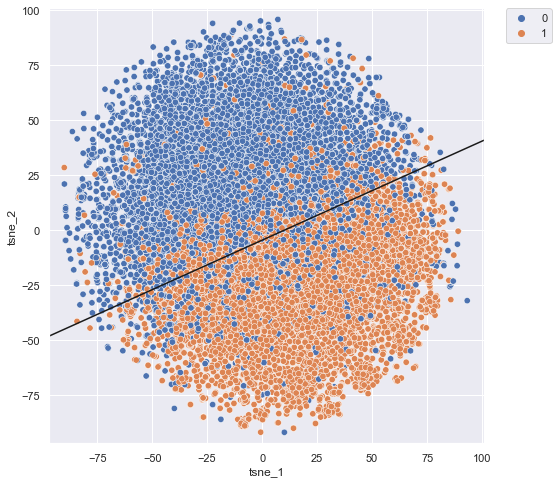

In [154]:
# Plot the results
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, lw=0, s=40)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plot_lr_decision_function(gnb);

## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)



RandomForestClassifier(random_state=0)

In [13]:
y_pred = RFC.predict(xv_test)
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 


Accuracy = 92.89%


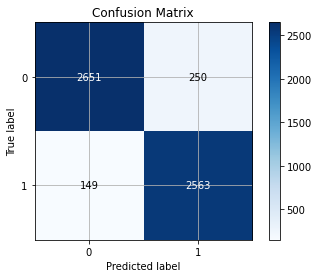

In [16]:
# Draw the confusion matrix
plot_cmat(y_test, y_pred)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2901
           1       0.91      0.95      0.93      2712

    accuracy                           0.93      5613
   macro avg       0.93      0.93      0.93      5613
weighted avg       0.93      0.93      0.93      5613



## Decision tree classifier 

In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=1234)
DT.fit(xv_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [19]:
y_pred = DT.predict(xv_test)
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 


Accuracy = 87.40%


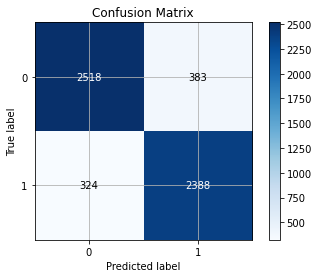

In [20]:
# Draw the confusion matrix
plot_cmat(y_test, y_pred)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2901
           1       0.86      0.88      0.87      2712

    accuracy                           0.87      5613
   macro avg       0.87      0.87      0.87      5613
weighted avg       0.87      0.87      0.87      5613



In [12]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               MultinomialNB(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234), 
               SVC(kernel = 'linear', probability=True)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(xv_train.todense(), y_train)
    yproba = model.predict_proba(xv_test.todense())[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

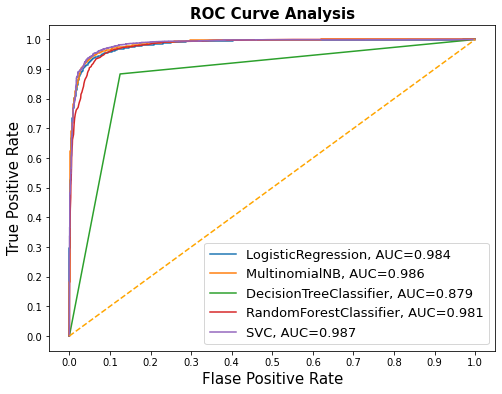

In [13]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()